# Семинар 7. Разведочный анализ данных

На этом семинаре мы поработаем с данными о продажах глобального интернет-магазина, реализующего офисные товары и технику. Цель занятия - научиться использовать методы разведочного анализа данных.

## Подготовка

Для работы вам понадобится пакет `seaborn` версии не ниже 0.11.

Так можно посмотреть, что у вас установлено:

In [ ]:
!conda list seaborn

# packages in environment at D:\anaconda:
#
# Name                    Version                   Build  Channel
seaborn                   0.11.2             pyhd3eb1b0_0  


Если у вас более старая версия этого пакета, то ее нужно обновить или установить. Раскомментируйте и запустите одну из команд:

In [ ]:
#!conda install -y seaborn=0.11
#!pip install seaborn==0.11

Проверьте, какая теперь версия у вас установлена, запустив первую ячейку (`!conda list`) еще раз

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Загрузим данные:

In [ ]:
orders = pd.read_csv('../datasets/global_superstore/orders.zip', encoding='utf-8',
                    parse_dates=['order_date', 'ship_date'],
                    dtype={'postal_code' : str})
orders.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,postal_code,city,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.980,2,0.0,62.1544,40.77,High
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   row_id          51290 non-null  int64         
 1   order_id        51290 non-null  object        
 2   order_date      51290 non-null  datetime64[ns]
 3   ship_date       51290 non-null  datetime64[ns]
 4   ship_mode       51290 non-null  object        
 5   customer_id     51290 non-null  object        
 6   customer_name   51290 non-null  object        
 7   segment         51290 non-null  object        
 8   postal_code     9994 non-null   object        
 9   city            51290 non-null  object        
 10  state           51290 non-null  object        
 11  country         51290 non-null  object        
 12  region          51290 non-null  object        
 13  market          51290 non-null  object        
 14  product_id      51290 non-null  object        
 15  ca

**Словарь данных:**

 - `row_id` - код строки заказа (уникальный)  
 - `order_id` - код заказа
 - `order_date` - дата размещения заказа
 - `ship_date` - дата отгрузки заказа (пусто, если еще не отгружен)
 - `ship_mode` - класс отправки
 - `customer_id` - код клиента
 - `customer_name` - имя клиента
 - `segment` - рыночный сегмент клиента
 - `postal_code` - почтовый индекс получателя
 - `city` - город получателя
 - `state` - штат получателя
 - `country` - страна получателя
 - `region` - регион получателя
 - `market` - рынок, к которому относится получатель
 - `product_id` - код товара
 - `category` - товарная категория
 - `sub_category` - товарная подкатегория
 - `product_name` - наименование товара
 - `sales` - выручка
 - `quantity` - количество единиц товара
 - `discount` - скидка
 - `profit` - валовая прибыль 
 - `shipping_cost` - затраты на доставку
 - `order_priority` - приоритет заказа
 

Данные представляют собой строки заказов, выполненных компанией. Каждая строка имеет уникальный номер `row_id` и содержит данные о том, кто, что и когда заказал, когда эта позиция была отправлена, адрес получателя. Также количество единиц, выручку, прибыль и затраты на доставку по строке. 

В одном заказе может быть несколько позиций. В этом случае в таблице будет несколько строк с одинаковым номером заказа:

In [ ]:
orders.query('order_id == "AE-2015-GH4665138-42351"')

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,postal_code,city,...,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
27486,43926,AE-2015-GH4665138-42351,2015-12-13,2015-12-19,Standard Class,GH-4665138,Greg Hansen,Consumer,NaN,Ras al Khaymah,...,TEC-PH-5253,Technology,Phones,"Motorola Headset, VoIP",95.796,4,0.7,-156.564,6.73,Medium
29298,43924,AE-2015-GH4665138-42351,2015-12-13,2015-12-19,Standard Class,GH-4665138,Greg Hansen,Consumer,NaN,Ras al Khaymah,...,OFF-ST-4078,Office Supplies,Storage,"Eldon Lockers, Blue",59.373,1,0.7,-118.767,5.83,Medium
33521,43922,AE-2015-GH4665138-42351,2015-12-13,2015-12-19,Standard Class,GH-4665138,Greg Hansen,Consumer,NaN,Ras al Khaymah,...,OFF-AR-3463,Office Supplies,Art,"BIC Pencil Sharpener, Water Color",77.256,8,0.7,-82.584,4.08,Medium
40033,43925,AE-2015-GH4665138-42351,2015-12-13,2015-12-19,Standard Class,GH-4665138,Greg Hansen,Consumer,NaN,Ras al Khaymah,...,OFF-ST-5693,Office Supplies,Storage,"Rogers File Cart, Single Width",42.489,1,0.7,-62.331,2.24,Medium
49469,43923,AE-2015-GH4665138-42351,2015-12-13,2015-12-19,Standard Class,GH-4665138,Greg Hansen,Consumer,NaN,Ras al Khaymah,...,OFF-BI-3246,Office Supplies,Binders,"Avery Binder Covers, Clear",3.159,1,0.7,-4.971,1.25,Medium
49470,43927,AE-2015-GH4665138-42351,2015-12-13,2015-12-19,Standard Class,GH-4665138,Greg Hansen,Consumer,NaN,Ras al Khaymah,...,OFF-BI-3249,Office Supplies,Binders,"Avery Binder Covers, Recycled",3.429,1,0.7,-3.891,1.25,Medium


Во всех заданиях необходимо использовать визуализацию для получения ответа на поставленный вопрос. Добавьте понятный заголовок графика и подпишите оси.

## 1. Одинаковы ли распределения размера заказа на рынках Европы и США/Канады?

Получите ответ в виде:

- Гистограммы/плотности распределения
- Ящичной диаграммы или ее аналога
- Столбиковой диаграммы с медианным размером заказа

In [ ]:
orders['market'].unique()

array(['USCA', 'Asia Pacific', 'Europe', 'Africa', 'LATAM'], dtype=object)

In [ ]:
orders_groupby = orders.groupby('market')

In [ ]:
orders_Europe = orders_groupby.get_group('Europe')
orders_USCA = orders_groupby.get_group('USCA')

D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quantity', ylabel='Density'>

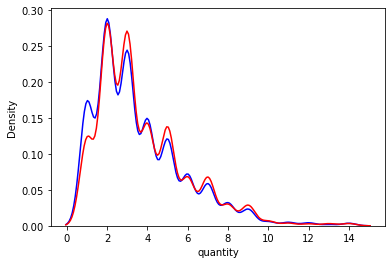

In [ ]:
sns.distplot(orders_Europe['quantity'], color = 'b', bins=6, hist=False)
sns.distplot(orders_USCA['quantity'], color = 'r', bins=6, hist=False)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


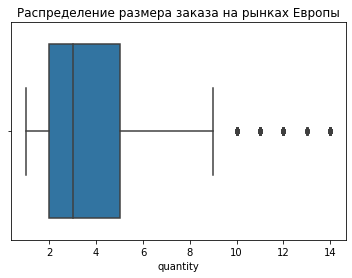

In [ ]:
sns.boxplot('quantity', data=orders_Europe)
plt.title('Распределение размера заказа на рынках Европы');

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


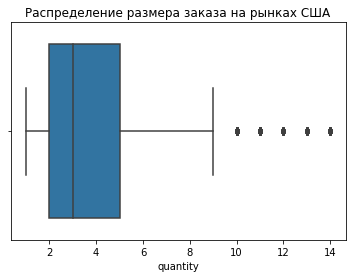

In [ ]:
sns.boxplot('quantity', data=orders_USCA)
plt.title('Распределение размера заказа на рынках США');

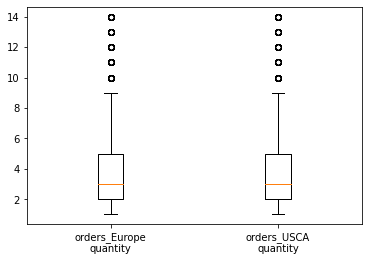

In [ ]:
plt.boxplot([orders_Europe['quantity'], orders_USCA['quantity']], labels=['orders_Europe\nquantity', 'orders_USCA\nquantity']);

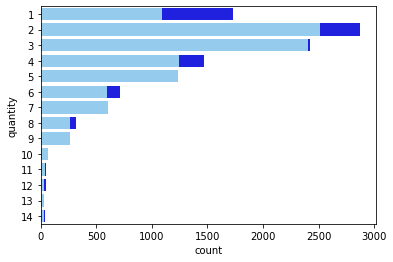

In [ ]:
sns.countplot(data=orders_Europe, y='quantity',
              color='blue');
sns.countplot(data=orders_USCA, y='quantity',
              color='lightskyblue');

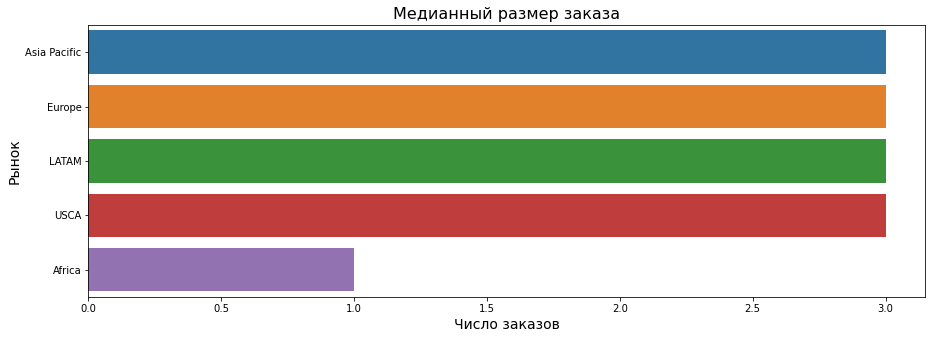

In [ ]:
plt.figure(figsize=(15, 5))

sns.barplot(y='market', x='quantity', data=orders,
           estimator=np.median,
           ci=None,
           order = orders.groupby('market')['quantity'].median().sort_values(ascending=False).index)


plt.title('Медианный размер заказа', fontsize=16)
plt.ylabel('Рынок', fontsize=14)
plt.xlabel('Число заказов', fontsize=14);

## 2. Составьте рейтинг товарных подкатегорий по обороту

In [ ]:
orders_sub_category = orders.groupby('sub_category').sum()['sales']

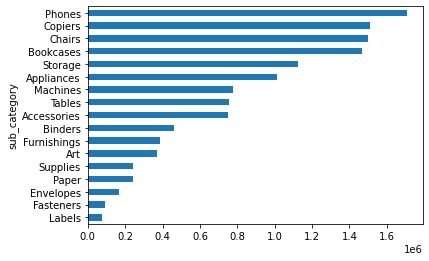

In [ ]:
orders_sub_category.sort_values().plot(kind='barh');

## 3. Сравните оборот по товарным категориям на рынках США/Канады и Европы

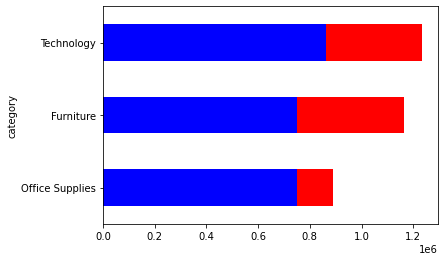

In [ ]:
orders_Europe_category = orders_Europe.groupby('category').sum()['sales']
orders_USCA_category = orders_USCA.groupby('category').sum()['sales']
orders_Europe_category.sort_values().plot(kind='barh', color = 'r')
orders_USCA_category.sort_values().plot(kind='barh', color = 'b');

## 4. Сравните товарные категории на различных рынках по относительной частоте заказов на них

Необходимо сравнить долю, приходящуюся на строки заказов, содержащие товары из каждой категории на заказо из каждой категории от общего количества строк заказов.

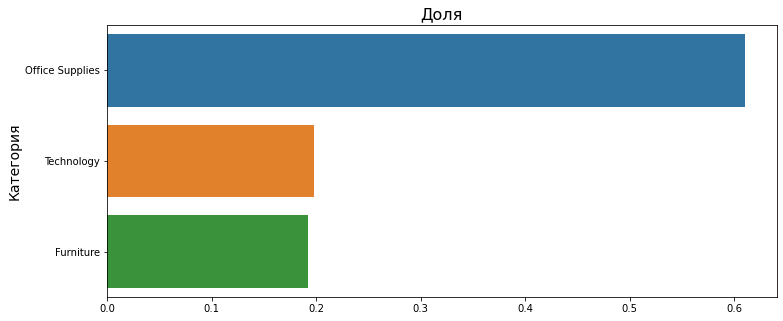

In [ ]:
orders_category = orders['category'].value_counts(normalize=True).reset_index() 
plt.figure(figsize=(12, 5))
sns.barplot(x = 'category', y = 'index', data=orders_category)
plt.title('Доля', fontsize=16)
plt.ylabel('Категория', fontsize=14);
plt.xlabel(None);

## 5. Сравните товарные категории на различных рынках по их доле в обороте на этом рынке

Постройте столбиковую диаграмму и тепловую карту.

In [ ]:
pd.crosstab(index=orders['category'], columns=orders['market'])

market,Africa,Asia Pacific,Europe,LATAM,USCA
category,,,,,
Furniture,631,2923,1777,2382,2147
Office Supplies,3045,8345,7718,5862,6319
Technology,911,3034,2234,2050,1912


In [ ]:
pd.crosstab(index=orders['category'], columns=orders['market'], normalize='columns')

market,Africa,Asia Pacific,Europe,LATAM,USCA
category,,,,,
Furniture,0.137563,0.204377,0.151505,0.231397,0.206880
Office Supplies,0.663833,0.583485,0.658027,0.569458,0.608884
Technology,0.198605,0.212138,0.190468,0.199145,0.184236


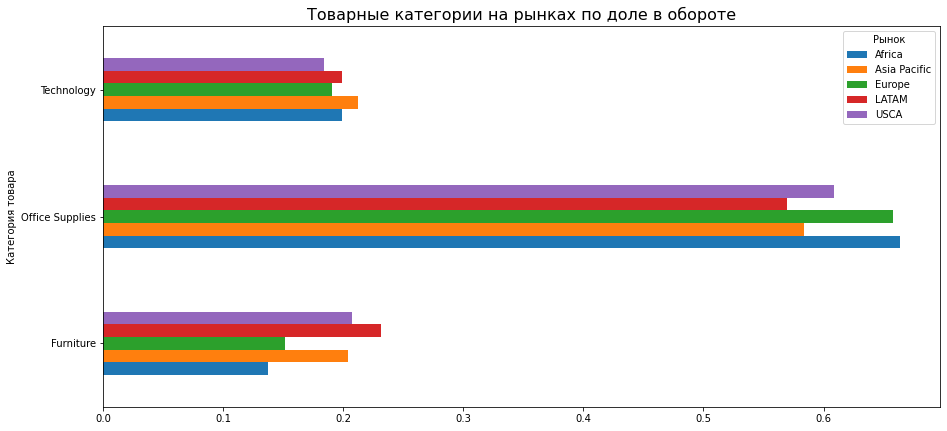

In [ ]:
fig, ax = plt.subplots(1, figsize=(15, 7))

pd.crosstab(index=orders['category'], columns=orders['market'], normalize='columns').plot(kind='barh', ax=ax)

plt.ylabel('Категория товара')
plt.legend(title='Рынок')
plt.title('Товарные категории на рынках по доле в обороте', fontsize=16);

In [ ]:
category_heatmap = orders.pivot_table('sales', index='category', columns='market', aggfunc='sum')
category_heatmap

market,Africa,Asia Pacific,Europe,LATAM,USCA
category,,,,,
Furniture,194650.635,1.461551e+06,8.901066e+05,811970.62000,752172.7873
Office Supplies,266755.533,1.043652e+06,1.163661e+06,563920.73200,749503.4000
Technology,322367.043,1.537455e+06,1.233569e+06,788713.81508,862452.8430


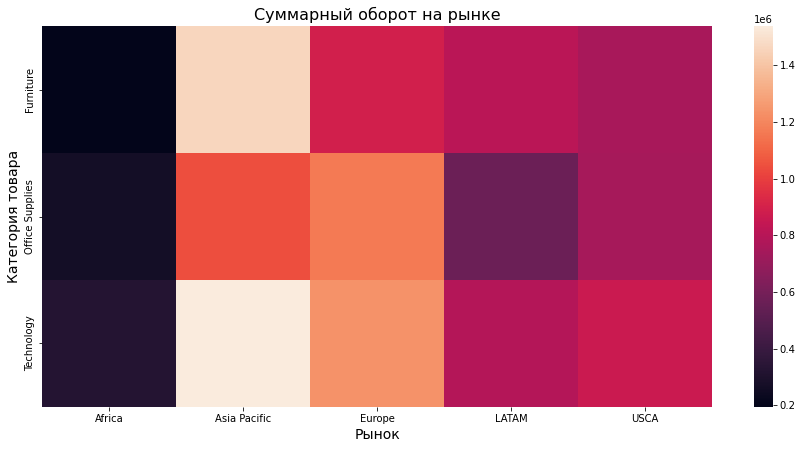

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(category_heatmap)
plt.ylabel('Категория товара', fontsize=14)
plt.xlabel('Рынок', fontsize=14)
plt.title('Суммарный оборот на рынке', fontsize=16);

## 6. Сравните рынки по выручке и прибыли

Постройте диаграмму рассеяния с трендом.  Верно ли утверждение: чем больше выручка - тем больше прибыль?  

Подпишите рынки на диаграмме

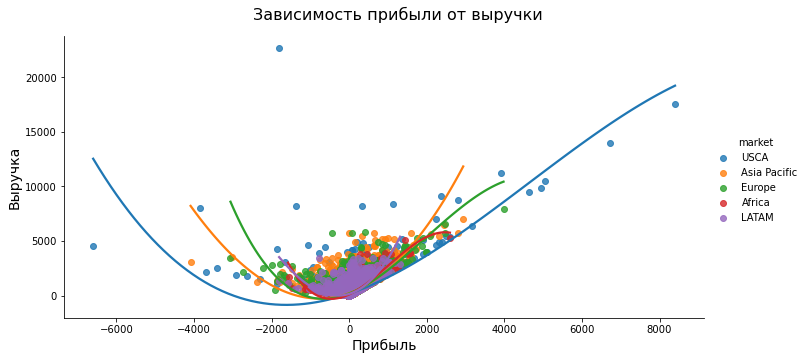

In [ ]:
sns.lmplot(x='profit', y='sales', hue='market',
           data=orders,
           order=3,
           ci=None, aspect=2);
plt.suptitle('Зависимость прибыли от выручки', fontsize=16)
plt.subplots_adjust(top=0.9) 
plt.xlabel('Прибыль', fontsize=14)
plt.ylabel('Выручка', fontsize=14);

## 7. Постройте матричную диаграмму рассеяния для всех количественных переменных в таблице `orders`

Между какими парами переменных зависимость наиболее сильно выражена?  
Верны ли утверждения:  
 - Чем больше количество проданного товара, тем больше прибыль?
 - Чем больше выручка, тем больше затраты на доставку?


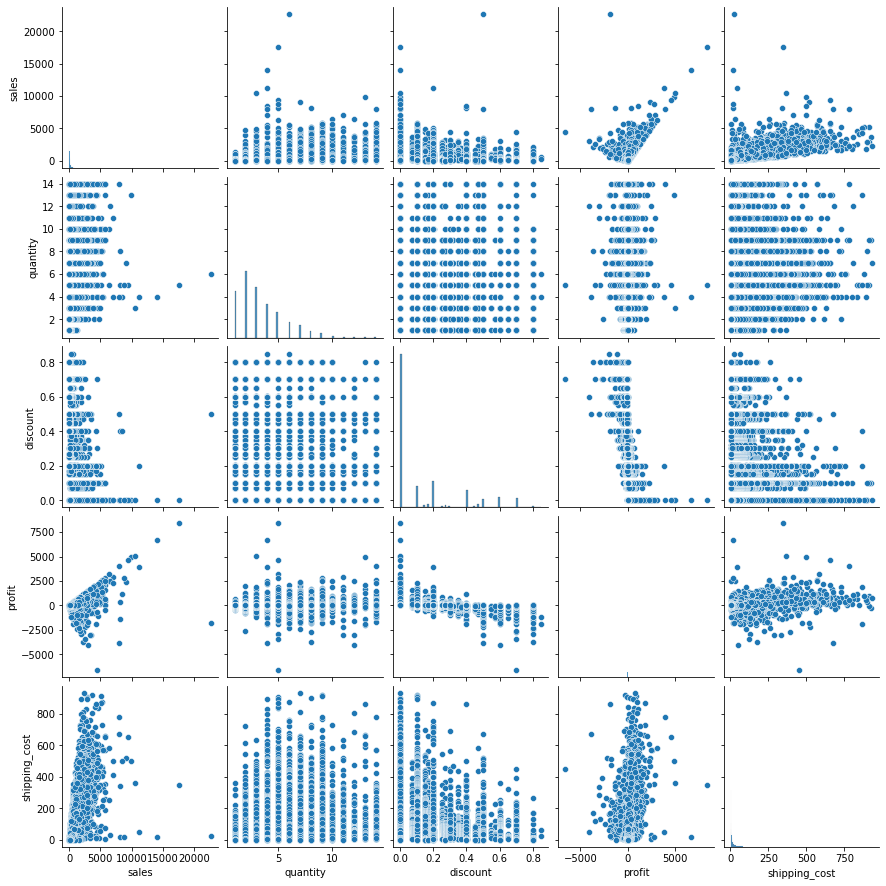

In [ ]:
sns.pairplot(orders[['sales', 'quantity', 'discount', 'profit', 'shipping_cost']]);

## 8. Постройте диаграмму рассеяния для зависимости между выручкой и прибылью для всех товарных категорий. 

Подсказки:  
  - Нужный график можно получить с помощью функции `lmplot()` пакета Seaborn
  - Можно уменьшить наложение точек, сделав их полупрозрачными и меньшего размера. Параметры точек диаграммы рассеяния можно настроить, добавив в функцию аргумент: `scatter_kws={'alpha':0.1, 's': 10}`. Так необходимо делать, потому что `lmplot()` сама не рисует точки, а запускает функцию `scatterplot()`. Параметры для этой функции передаются через словарь.



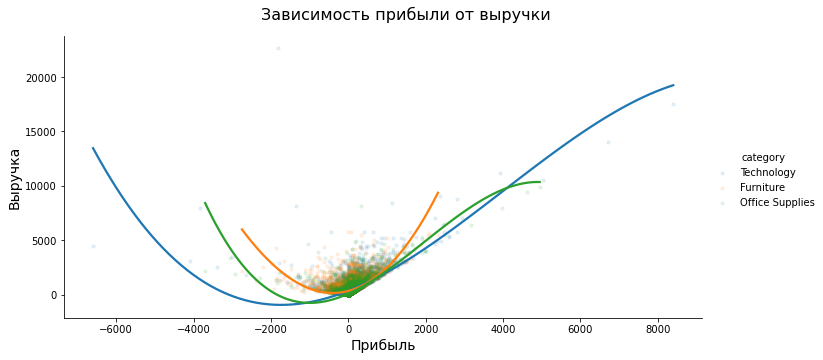

In [ ]:
sns.lmplot(x='profit', y='sales', hue='category',
           data=orders,
           order=3,
           ci=None, aspect=2,
          scatter_kws={'alpha':0.1, 's': 10});
plt.suptitle('Зависимость прибыли от выручки', fontsize=16)
plt.subplots_adjust(top=0.9) 
plt.xlabel('Прибыль', fontsize=14)
plt.ylabel('Выручка', fontsize=14);

## 9. Постройте диаграмму рассеяния для зависимости прибыли от выручки для стран

Точки на диаграмме должны соответствовать странам. Цвет точки - рынку, к которому относится страна, положение точки должно определяться суммарным оборотом и прибылью для этой страны, а размер точки - средней величиной скидки.

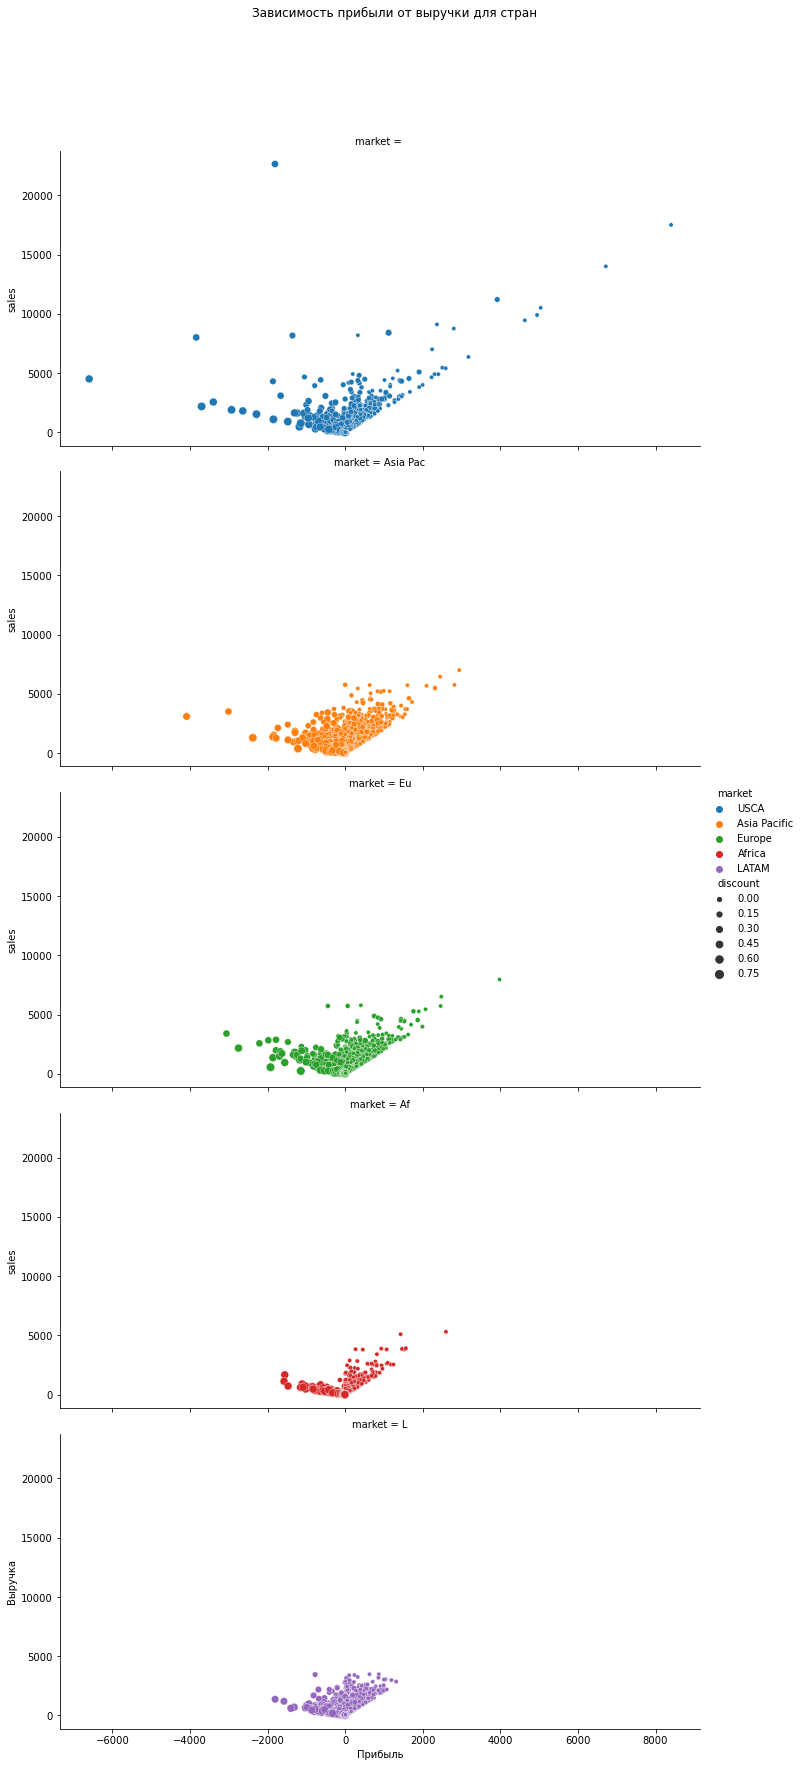

In [ ]:
sns.relplot(x='profit', y='sales', hue='market', size='discount',
           row=orders['market'].str[:-4],
           data=orders,
           kind='scatter', aspect=2);
plt.suptitle('Зависимость прибыли от выручки для стран')
plt.subplots_adjust(top=0.9)
plt.xlabel('Прибыль')
plt.ylabel('Выручка');